# `Differentiation`

In [2]:
# These are the libraries will be useing for this lab.

import torch 
import matplotlib.pylab as plt


<h2><code>Practice</code></h2>
Calculate the derivative of: <code> dy(x = 1)/dx = 2x^3 + x</code>


In [4]:
x = torch.tensor(1.0, requires_grad=True)

y = 2*(x**3) + x
print(f"y(x = 1)= {y}")

y.backward()
print(f"dy/dx(x = 1)= {x.grad}")

y(x = 1)= 3.0
dy/dx(x = 1)= 7.0


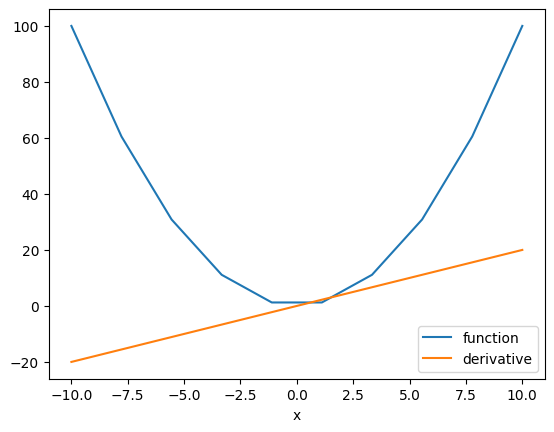

In [17]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2

y = torch.sum(Y)
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

## `Practice`
Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [16]:
u = torch.tensor(2.0, requires_grad = True)
v = torch.tensor(1.0, requires_grad = True)

f = u * v + (u * v) ** 2
print(f"f(u = 2, v = 1) = {f}")

f.backward()
print(f"df/du(u = 2, v = 1) = {u.grad}")
print(f"df/dv(u = 2, v = 1) = {v.grad}")

f(u = 2, v = 1) = 6.0
df/du(u = 2, v = 1) = 5.0
df/dv(u = 2, v = 1) = 10.0


## `Practice`

Plot the graphic of the previous assigment.

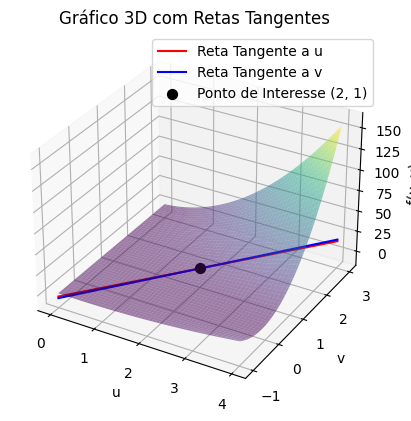

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ponto de interesse
u_value = 2.0
v_value = 1.0

# Definindo a função
def f(u, v):
    return u * v + (u * v) ** 2

# Preparando os dados para o gráfico
u_range = np.linspace(u_value - 2, u_value + 2, 100)
v_range = np.linspace(v_value - 2, v_value + 2, 100)
U, V = np.meshgrid(u_range, v_range)
F = f(U, V)

# Calculando as derivadas parciais
u_grad = 1 + 2 * u_value * v_value
v_grad = u_value + 2 * u_value * v_value

# Equação da reta tangente em relação a 'u'
def tangent_u(u, v, u_value, v_value):
    return u_grad * (u - u_value) + v_grad * (v - v_value) + f(u_value, v_value)

# Equação da reta tangente em relação a 'v'
def tangent_v(u, v, u_value, v_value):
    return u_grad * (u - u_value) + v_grad * (v - v_value) + f(u_value, v_value)

# Configurar o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície da função
ax.plot_surface(U, V, F, cmap='viridis', alpha=0.5)

# Plotar as retas tangentes
ax.plot(u_range, v_range, tangent_u(u_range, v_value, u_value, v_value), color='red', label='Reta Tangente a u')
ax.plot(u_range, v_range, tangent_v(u_value, v_range, u_value, v_value), color='blue', label='Reta Tangente a v')

# Plotar o ponto de interesse
ax.scatter(u_value, v_value, f(u_value, v_value), color='black', s=50, label='Ponto de Interesse (2, 1)')

# Configurar rótulos e legendas
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('f(u, v)')
ax.set_title('Gráfico 3D com Retas Tangentes')
ax.legend()

plt.show()


### `Derivada no ponto`:

In [2]:

def f_prime(x: float, h: float= 1e-6):
    return (f(x + h) - f(x - h)) / (2 * h)

def tangent_line(x, x_point, y_point):
    return f_prime(x_point) * (x - x_point) + y_point

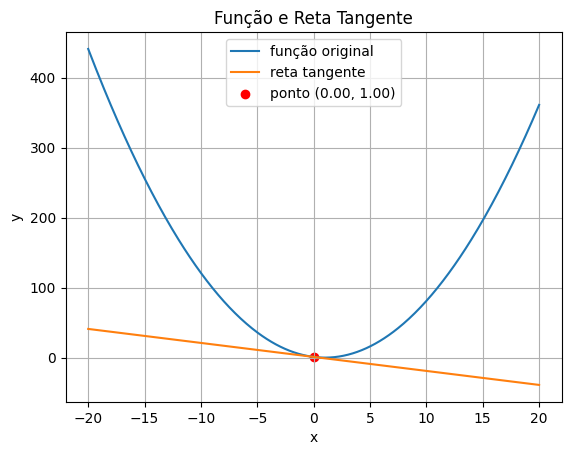

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 2 - 2 * x + 1

x_point = 0  
y_point = f(x_point)

x_range = np.linspace(x_point - 20, x_point + 20, 400)
tangent_y = tangent_line(x_range, x_point, y_point)

plt.plot(x_range, f(x_range), label='função original')
plt.plot(x_range, tangent_y, label='reta tangente')
plt.scatter(x_point, y_point, color='red', label=f'ponto ({x_point:.2f}, {y_point:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Função e Reta Tangente')
plt.grid(True)
plt.show()
